<a href="https://colab.research.google.com/github/Ranimyassaf/NewCode/blob/main/GAN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 11.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.40MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.97MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/50] Loss D: 0.7563, Loss G: 1.8968


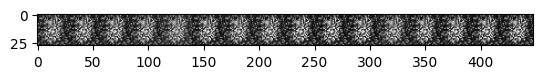

Epoch [2/50] Loss D: 0.2586, Loss G: 3.4350


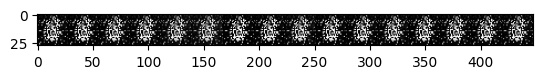

Epoch [3/50] Loss D: 0.4057, Loss G: 3.0504


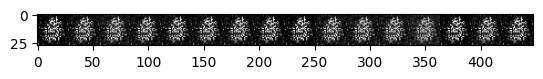

Epoch [4/50] Loss D: 1.2777, Loss G: 1.2092


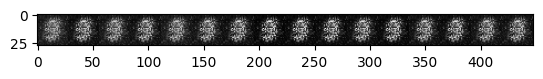

Epoch [5/50] Loss D: 1.4855, Loss G: 1.4694


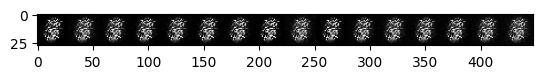

Epoch [6/50] Loss D: 1.5562, Loss G: 0.9820


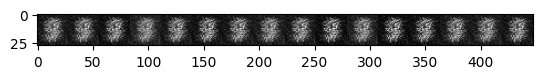

Epoch [7/50] Loss D: 0.7785, Loss G: 2.0194


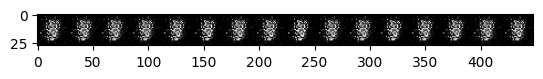

Epoch [8/50] Loss D: 0.2964, Loss G: 2.6805


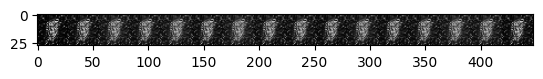

Epoch [9/50] Loss D: 0.3660, Loss G: 4.4000


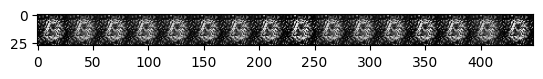

Epoch [10/50] Loss D: 0.1255, Loss G: 3.5597


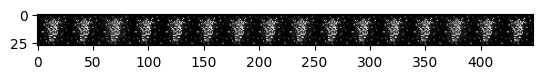

Epoch [11/50] Loss D: 0.4999, Loss G: 3.6963


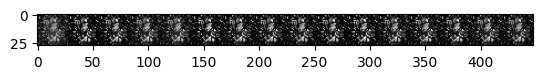

Epoch [12/50] Loss D: 0.1990, Loss G: 4.1639


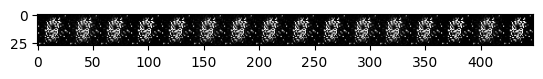

Epoch [13/50] Loss D: 0.1637, Loss G: 4.3924


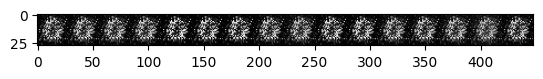

Epoch [14/50] Loss D: 1.3659, Loss G: 4.8574


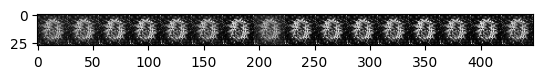

Epoch [15/50] Loss D: 0.1331, Loss G: 4.2118


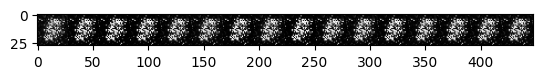

Epoch [16/50] Loss D: 0.3002, Loss G: 3.9344


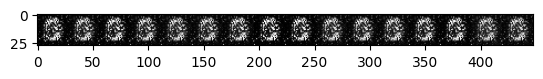

Epoch [17/50] Loss D: 0.1927, Loss G: 4.2254


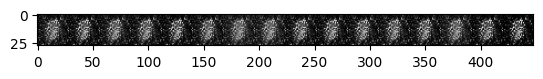

Epoch [18/50] Loss D: 0.3287, Loss G: 5.1961


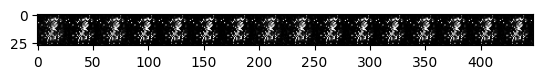

Epoch [19/50] Loss D: 0.2220, Loss G: 3.8577


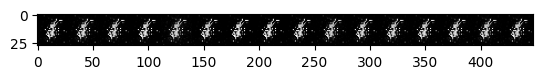

Epoch [20/50] Loss D: 0.1620, Loss G: 4.3587


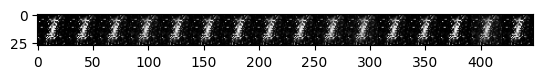

Epoch [21/50] Loss D: 0.4286, Loss G: 3.5652


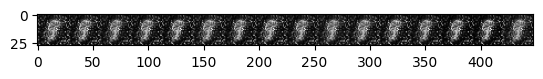

Epoch [22/50] Loss D: 0.3676, Loss G: 5.4195


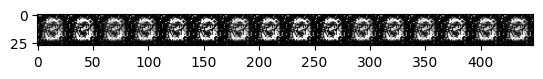

Epoch [23/50] Loss D: 0.2255, Loss G: 5.2938


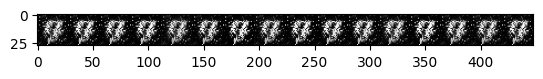

Epoch [24/50] Loss D: 0.4487, Loss G: 5.6269


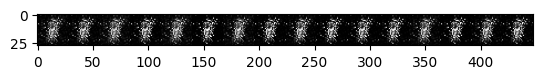

Epoch [25/50] Loss D: 0.0826, Loss G: 5.1964


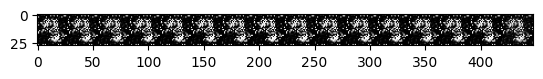

Epoch [26/50] Loss D: 0.0807, Loss G: 5.9362


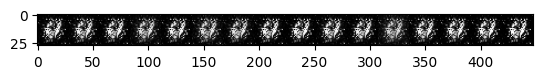

Epoch [27/50] Loss D: 0.1929, Loss G: 6.0252


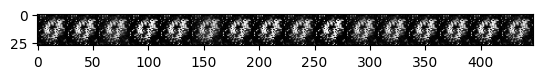

Epoch [28/50] Loss D: 0.1410, Loss G: 5.3179


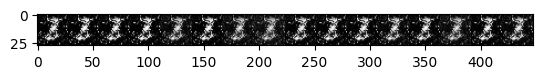

Epoch [29/50] Loss D: 0.1448, Loss G: 6.6411


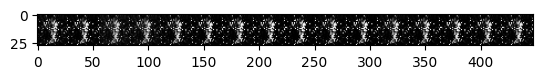

Epoch [30/50] Loss D: 0.3587, Loss G: 10.6412


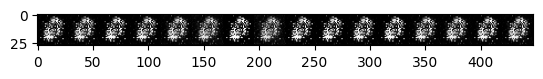

Epoch [31/50] Loss D: 0.1583, Loss G: 4.2818


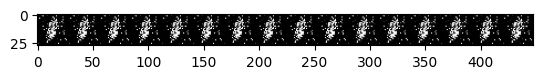

Epoch [32/50] Loss D: 0.0410, Loss G: 5.5865


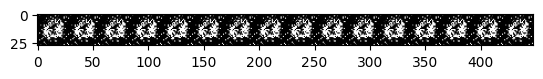

Epoch [33/50] Loss D: 0.0065, Loss G: 6.8690


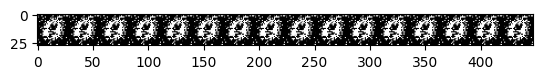

Epoch [34/50] Loss D: 0.1864, Loss G: 5.7077


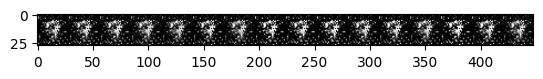

Epoch [35/50] Loss D: 0.1408, Loss G: 6.8380


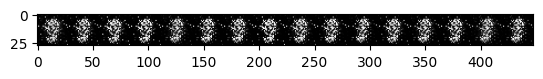

Epoch [36/50] Loss D: 0.2271, Loss G: 5.8566


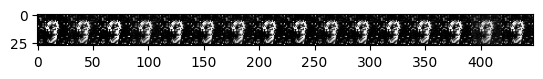

Epoch [37/50] Loss D: 0.0858, Loss G: 7.5032


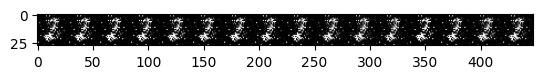

Epoch [38/50] Loss D: 0.0619, Loss G: 6.6057


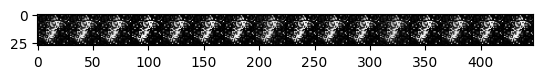

Epoch [39/50] Loss D: 0.1218, Loss G: 5.6904


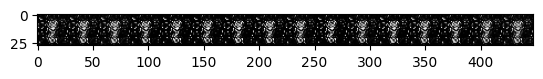

Epoch [40/50] Loss D: 0.0685, Loss G: 8.2902


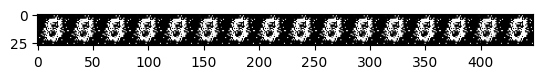

Epoch [41/50] Loss D: 0.0777, Loss G: 7.4050


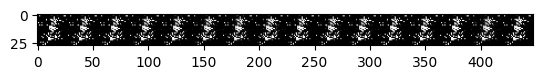

Epoch [42/50] Loss D: 0.0903, Loss G: 5.5976


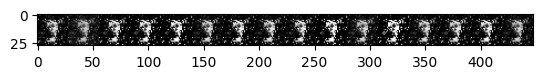

Epoch [43/50] Loss D: 0.2793, Loss G: 14.0824


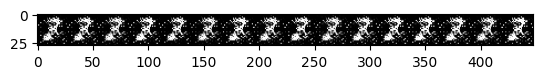

Epoch [44/50] Loss D: 0.0781, Loss G: 8.1521


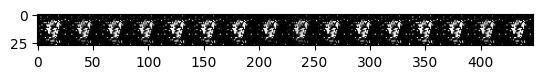

Epoch [45/50] Loss D: 0.0141, Loss G: 7.5951


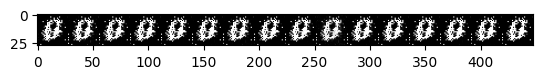

Epoch [46/50] Loss D: 0.0037, Loss G: 9.0844


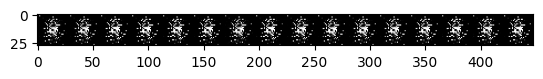

Epoch [47/50] Loss D: 0.0359, Loss G: 7.5078


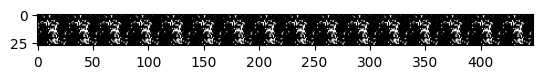

Epoch [48/50] Loss D: 0.1094, Loss G: 9.0480


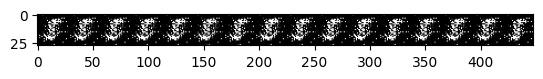

Epoch [49/50] Loss D: 0.0558, Loss G: 14.8438


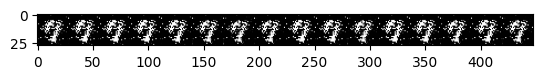

Epoch [50/50] Loss D: 0.0281, Loss G: 6.8326


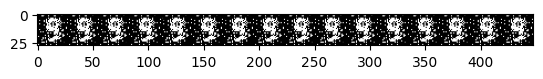

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BATCH_SIZE = 128
LATENT_DIM = 100
EPOCHS = 50

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_loader = DataLoader(datasets.MNIST(root='./data', train=True, download=True, transform=transform),
                          batch_size=BATCH_SIZE, shuffle=True)


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(LATENT_DIM, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z).view(-1, 1, 28, 28)


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

generator = Generator().to(device)
discriminator = Discriminator().to(device)


criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=1e-4)
optimizer_D = optim.Adam(discriminator.parameters(), lr=1e-4)


for epoch in range(EPOCHS):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        real_images = real_images.to(device)
        batch_size = real_images.size(0)

        z = torch.randn(batch_size, LATENT_DIM).to(device)
        fake_images = generator(z)
        D_real = discriminator(real_images)
        D_fake = discriminator(fake_images.detach())
        loss_D = criterion(D_real, torch.ones_like(D_real)) + criterion(D_fake, torch.zeros_like(D_fake))
        optimizer_D.zero_grad()
        loss_D.backward()
        optimizer_D.step()

        D_fake = discriminator(fake_images)
        loss_G = criterion(D_fake, torch.ones_like(D_fake))
        optimizer_G.zero_grad()
        loss_G.backward()
        optimizer_G.step()

    print(f'Epoch [{epoch+1}/{EPOCHS}] Loss D: {loss_D:.4f}, Loss G: {loss_G:.4f}')

    # Generate sample images
    z = torch.randn(16, LATENT_DIM).to(device)
    fake_images = generator(z).cpu().detach()
    grid = torch.cat([img.squeeze(0) for img in fake_images], dim=1)
    plt.imshow(grid, cmap='gray')
    plt.show()
